In [71]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [73]:
dataset = pd.read_csv("VLagun_Phys_Years3.csv")

In [74]:
dataset.shape

(120, 9)

In [75]:
dataset.head()

,PSU,O2,temp.,SS,DOC,TPOC,Windspeedinsitu,Depth,Years
0,3.757624,9.46,18.3,52.0,7.500,8.5650,3.5,3.3,0
1,3.504707,9.89,19.1,50.0,7.860,8.5200,0.0,3.6,0
2,3.757624,9.66,18.1,59.0,8.172,8.4915,1.0,3.4,0
3,3.107266,10.36,19.5,46.0,7.848,8.8320,0.0,2.9,0
4,2.619498,11.56,19.0,42.0,7.536,9.2400,0.0,3.0,0


In [76]:
X = dataset.iloc[:,[2,6]].values
Y = dataset.iloc[:,8].values

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.3, random_state = 0)

In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [79]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [80]:
Y_pred = classifier.predict(X_test)
Y_pred_train = classifier.predict(X_train)

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print(f'Training acc: {accuracy_score(Y_train,Y_pred_train)}')
print(f'Test acc: {accuracy_score(Y_test,Y_pred)}')

[[20  2]
 [ 1 13]]
Training acc: 0.7976190476190477
Test acc: 0.9166666666666666


Podejrzenie Overfittingu

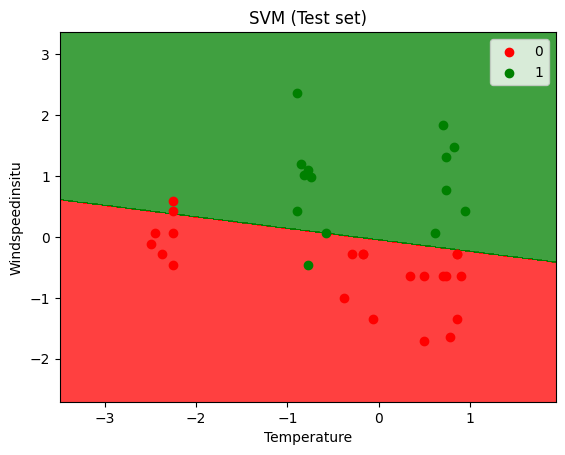

In [82]:
from matplotlib.colors import ListedColormap

X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0 ].min() -1, stop =  X_set[:, 0 ].max() +1, step = 0.01),
                     np.arange(start = X_set[:, 1 ].min() -1, stop =  X_set[:, 1 ].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('SVM (Test set)')
plt.xlabel('Temperature')
plt.ylabel('Windspeedinsitu')
plt.legend()
plt.show()                     

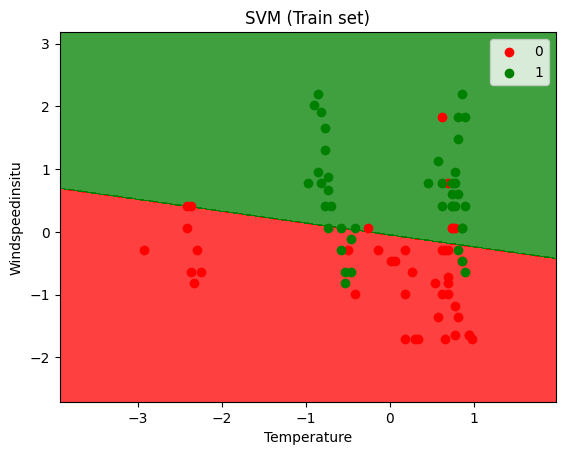

In [83]:
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0 ].min() -1, stop =  X_set[:, 0 ].max() +1, step = 0.01),
                     np.arange(start = X_set[:, 1 ].min() -1, stop =  X_set[:, 1 ].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('SVM (Train set)')
plt.xlabel('Temperature')
plt.ylabel('Windspeedinsitu')
plt.legend()
plt.show()  

In [84]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
Y_pred_train = classifier.predict(X_train)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print(f'Training acc: {accuracy_score(Y_train,Y_pred_train)}')
print(f'Test acc: {accuracy_score(Y_test,Y_pred)}')

[[19  3]
 [ 0 14]]
Training acc: 0.8809523809523809
Test acc: 0.9166666666666666


Podejrzenie overfittingu

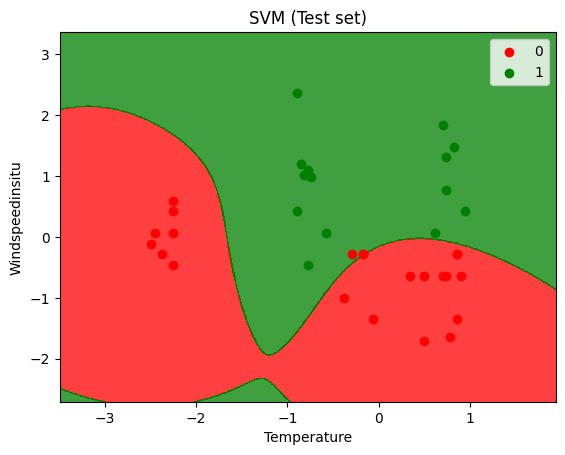

In [85]:
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0 ].min() -1, stop =  X_set[:, 0 ].max() +1, step = 0.01),
                     np.arange(start = X_set[:, 1 ].min() -1, stop =  X_set[:, 1 ].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('SVM (Test set)')
plt.xlabel('Temperature')
plt.ylabel('Windspeedinsitu')
plt.legend()
plt.show()   

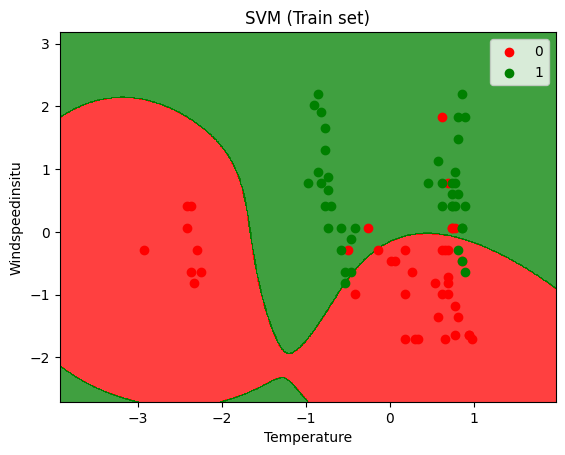

In [86]:
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0 ].min() -1, stop =  X_set[:, 0 ].max() +1, step = 0.01),
                     np.arange(start = X_set[:, 1 ].min() -1, stop =  X_set[:, 1 ].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('SVM (Train set)')
plt.xlabel('Temperature')
plt.ylabel('Windspeedinsitu')
plt.legend()
plt.show()  

In [87]:
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
Y_pred_train = classifier.predict(X_train)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print(f'Training acc: {accuracy_score(Y_train,Y_pred_train)}')
print(f'Test acc: {accuracy_score(Y_test,Y_pred)}')

[[ 9 13]
 [ 0 14]]
Training acc: 0.7619047619047619
Test acc: 0.6388888888888888


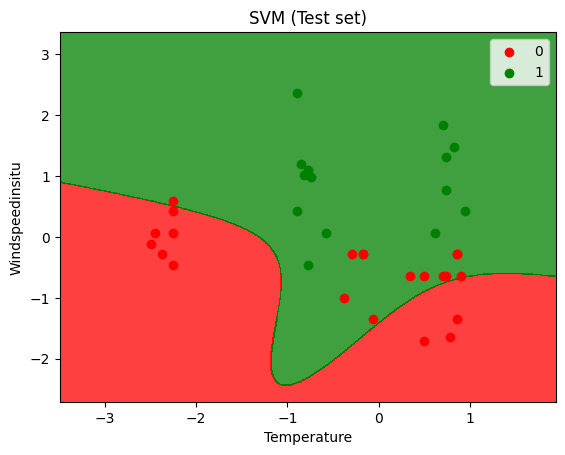

In [88]:
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0 ].min() -1, stop =  X_set[:, 0 ].max() +1, step = 0.01),
                     np.arange(start = X_set[:, 1 ].min() -1, stop =  X_set[:, 1 ].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('SVM (Test set)')
plt.xlabel('Temperature')
plt.ylabel('Windspeedinsitu')
plt.legend()
plt.show()   

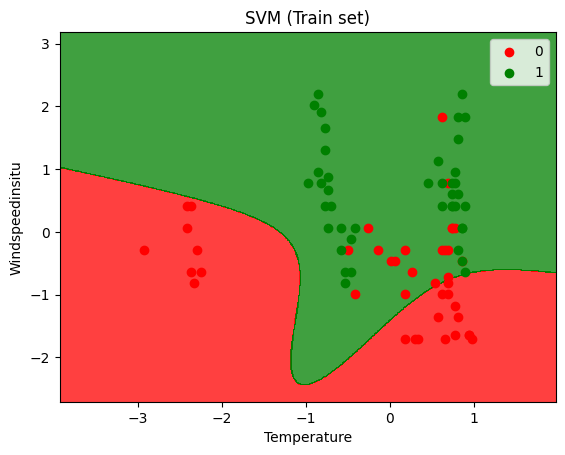

In [89]:
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0 ].min() -1, stop =  X_set[:, 0 ].max() +1, step = 0.01),
                     np.arange(start = X_set[:, 1 ].min() -1, stop =  X_set[:, 1 ].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('SVM (Train set)')
plt.xlabel('Temperature')
plt.ylabel('Windspeedinsitu')
plt.legend()
plt.show() 

In [90]:
classifier = SVC(kernel = 'sigmoid', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
Y_pred_train = classifier.predict(X_train)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print(f'Training acc: {accuracy_score(Y_train,Y_pred_train)}')
print(f'Test acc: {accuracy_score(Y_test,Y_pred)}')

[[15  7]
 [ 3 11]]
Training acc: 0.6547619047619048
Test acc: 0.7222222222222222


Podejrzenie overfittingu

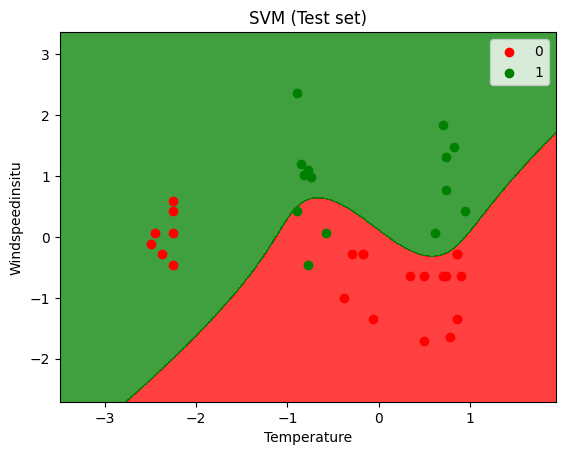

In [91]:
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0 ].min() -1, stop =  X_set[:, 0 ].max() +1, step = 0.01),
                     np.arange(start = X_set[:, 1 ].min() -1, stop =  X_set[:, 1 ].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('SVM (Test set)')
plt.xlabel('Temperature')
plt.ylabel('Windspeedinsitu')
plt.legend()
plt.show()   

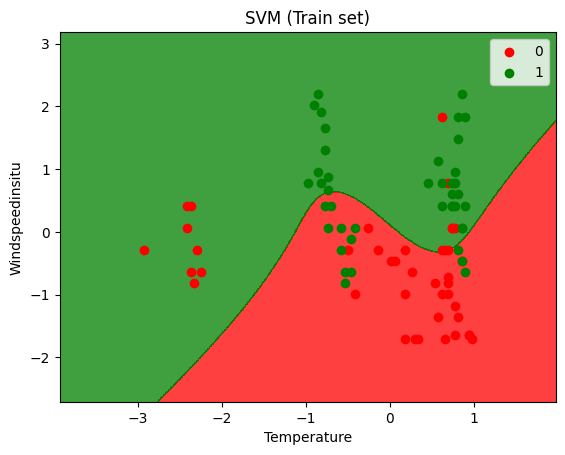

In [92]:
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0 ].min() -1, stop =  X_set[:, 0 ].max() +1, step = 0.01),
                     np.arange(start = X_set[:, 1 ].min() -1, stop =  X_set[:, 1 ].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('SVM (Train set)')
plt.xlabel('Temperature')
plt.ylabel('Windspeedinsitu')
plt.legend()
plt.show() 

Najwyższy wskaźnik dokładności dla tego zestawu danych jest dla jądra promieniowego.